In [2]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def preprocessing_data(input_file):
    def is_numeric(value):
        try:
            float(value)
            return True
        except ValueError:
            return False
    output_file = f'preprocessed_{input_file}'
    with open(input_file, 'r') as f_in:
        reader = csv.reader(f_in)
        cleaned_rows = []
        for row in reader:
            cleaned_row = [cell for cell in row if is_numeric(cell)]
            if cleaned_row:
                cleaned_rows.append(cleaned_row)
    with open(output_file, 'w', newline='') as f_out:
        writer = csv.writer(f_out)
        writer.writerows(cleaned_rows)
    print(f"Filtered CSV data has been written to {output_file}")
    return output_file

In [3]:
# col = ["title", "num_cluster", "num_callgraph", "depth", "fanout", "num_svc", "num_endpoint", "solver_time"]
# df = pd.read_csv("result.csv", names=col)
df = pd.read_csv("result.csv")
df = df.sort_values(by=['num_svc', 'num_endpoint', 'num_cluster', 'num_callgraph'])
df.reset_index(drop=True, inplace=True)
df

,title,num_cluster,num_callgraph,depth,fanout,num_svc,num_endpoint,solver_time
0,solver_time,2,2,1,2,3,6,0.040376
1,solver_time,3,2,1,2,3,6,0.092667
2,solver_time,4,2,1,2,3,6,0.131243
3,solver_time,5,2,1,2,3,6,0.271333
4,solver_time,6,2,1,2,3,6,0.636410
5,solver_time,7,2,1,2,3,6,1.226311
6,solver_time,8,2,1,2,3,6,2.199327
7,solver_time,9,2,1,2,3,6,5.325581
8,solver_time,10,2,1,2,3,6,8.964756
9,solver_time,11,2,1,2,3,6,9.378655


In [35]:
def parse_and_plot(fn, fanout, num_callgraph, xaxis, degree):
    # col = ["num_cluster2", "num_callgraph", "depth", "fanout", "num_cluster", "num_svc", "num_endpoint", "solver_time"]
    # df = pd.read_csv(fn, names=col)
    df = pd.read_csv(fn)
    df = df[df["degree"]==degree]
    df = df[df["fanout"]==fanout]
    df = df[(df["num_cluster"]==2) | (df["num_cluster"]==4) | (df["num_cluster"]==6) | (df["num_cluster"]==8) | (df["num_cluster"]==10)]
    df = df[df["num_callgraph"]==num_callgraph]
    # display(df)
    df_sorted = df.sort_values(by=['num_svc', 'num_endpoint', 'num_cluster', 'num_callgraph'])
    df_sorted.reset_index(drop=True, inplace=True)
    clusters = df_sorted["num_cluster"].unique()
    colors = plt.cm.rainbow(np.linspace(0, 1, len(clusters)))
    # plt.figure(figsize=(10, 7))
    for color, cluster in zip(colors, clusters):
        cluster_data = df_sorted[df_sorted["num_cluster"] == cluster]
        # plt.scatter(cluster_data[xaxis], cluster_data["solver_time"], color=color, alpha=0.6, label=f'Cluster {cluster}')
        plt.plot(cluster_data[xaxis], cluster_data["solver_time"], label=f'Cluster {cluster}', marker='o')
    plt.title(f"Num call graph {num_callgraph}", fontsize=18)
    plt.xlabel(xaxis, fontsize=18)
    plt.ylabel("Time (seconds)", fontsize=18)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend()  # Display the legend to distinguish clusters
    plt.savefig(f"scalability-numcallgraph{num_callgraph}-degree{degree}-xaxis{xaxis}.pdf")
    plt.show()

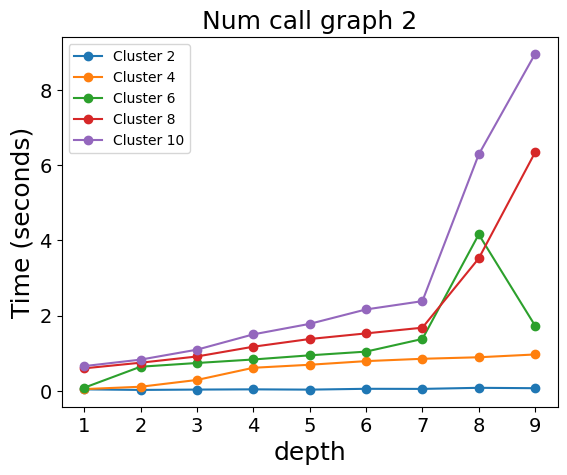

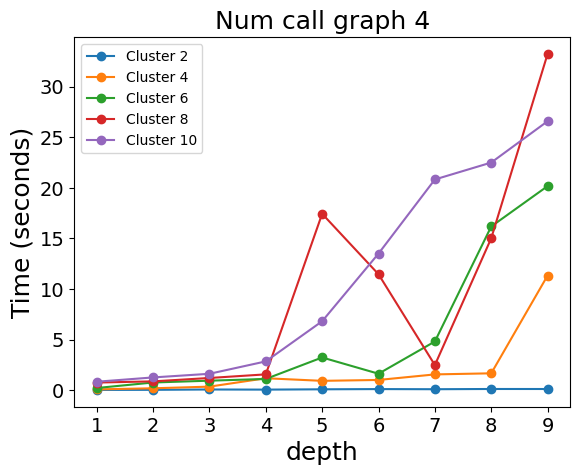

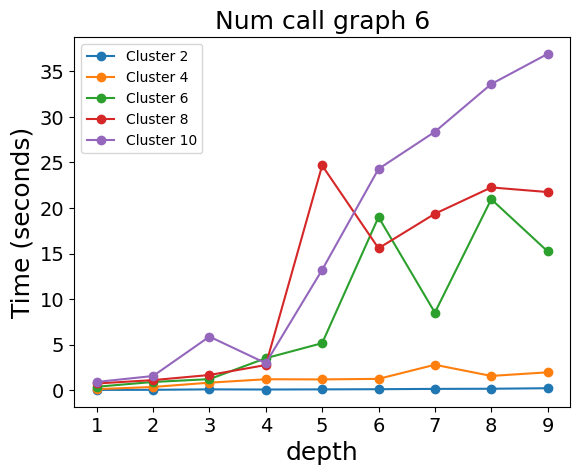

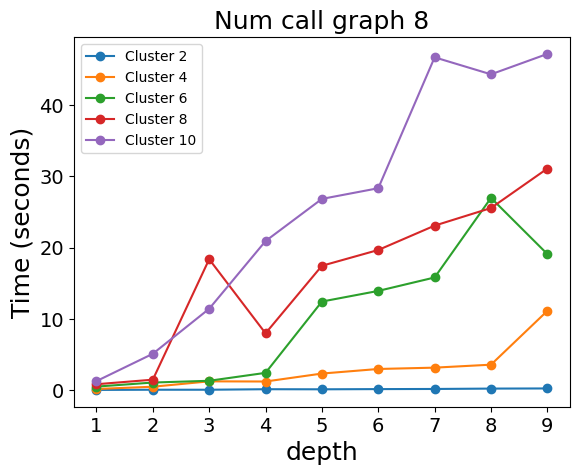

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


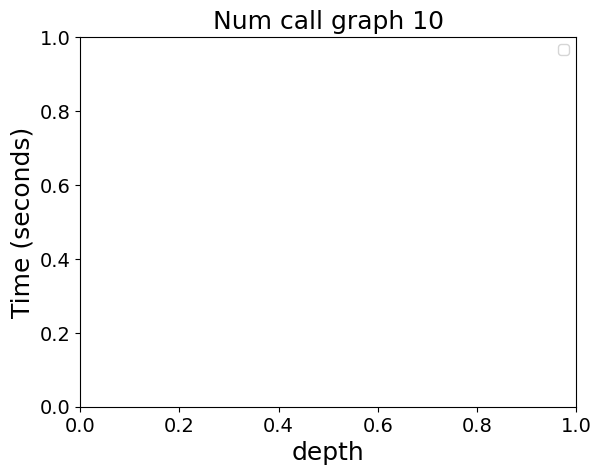

In [42]:
fn="result.csv"
parse_and_plot(fn, fanout=1, num_callgraph=2, xaxis="depth", degree=1)
parse_and_plot(fn, fanout=1, num_callgraph=4, xaxis="depth", degree=1)
parse_and_plot(fn, fanout=1, num_callgraph=6, xaxis="depth", degree=1)
parse_and_plot(fn, fanout=1, num_callgraph=8, xaxis="depth", degree=1)

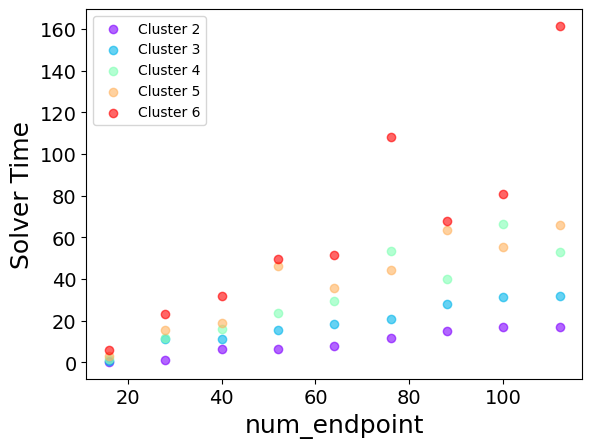

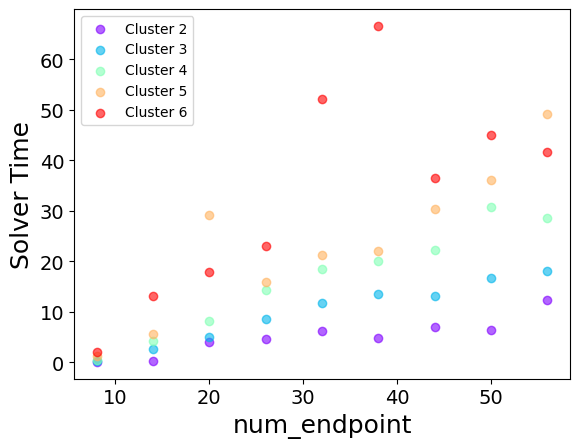

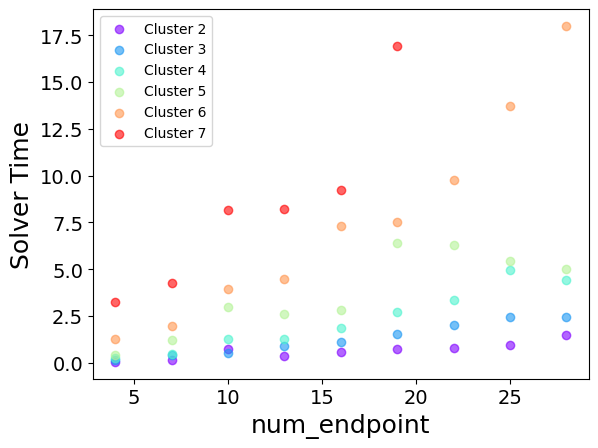

In [7]:
fn="result_4.csv"
# parse_and_plot(fn, fanout=3, num_callgraph=4, xaxis="num_svc")
# parse_and_plot(fn, fanout=3, num_callgraph=2, xaxis="num_svc")
# parse_and_plot(fn, fanout=3, num_callgraph=1, xaxis="num_svc")
parse_and_plot(fn, fanout=3, num_callgraph=4, xaxis="num_endpoint")
parse_and_plot(fn, fanout=3, num_callgraph=2, xaxis="num_endpoint")
parse_and_plot(fn, fanout=3, num_callgraph=1, xaxis="num_endpoint")